# Plots stakehodler presentation

In [2]:
import sys
sys.path.insert(1, '/Users/lauradellantonio/neuefische/Capstone/capstone')


In [42]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import functions.functions_data
import functions.functions_mask_wearing
import functions.functions_get_group
import functions.functions_HDI

import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings(action='ignore')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None) # To display all columns

# Mask wearing: date and gender

In [10]:
dfs_country = functions.functions_data.get_data("data/CMU_Global_data/Full_Survey_Data/country/smooth/", "country")

Read in data completed.


In [18]:
countries = pd.concat(dfs_country, ignore_index=True)

In [19]:
# Getting the dictionaries for the hdi and the hdi-levels.
dict_hdi, dict_hdi_levels = functions.functions_HDI.get_hdi("data","hdro_statistical_data_tables_1_15_d1_d5.xlsx")

# Creating a new column with the hdi and the hdi-levels in the regions dataframe
countries = functions.functions_HDI.create_hdi_columns(countries, dict_hdi, dict_hdi_levels)

Creating dictionaries for hdi and hdi-levels completed.
Creating hdi list completed.
Creating hdi-level list completed.


In [20]:
df_countries = countries

In [21]:
# Deal with NaN's in the wearing mask all the time column
df_complete = functions.functions_mask_wearing.deal_with_NaNs_masks(df_countries)

# Change object into datetime object and create month column
df_month = functions.functions_data.insert_month(df_complete)

NaNs before update: 165309
NaNs after update: 0
Updated.
Created month column.


In [23]:
df=df_month

In [26]:
df.head()

,Unnamed: 0,country_agg,GID_0,gender,age_bucket,date,rolling_total_responses,weight_sums,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_fever,smoothed_pct_cough,smoothed_pct_difficulty_breathing,smoothed_pct_fatigue,smoothed_pct_stuffy_runny_nose,smoothed_pct_aches_muscle_pain,smoothed_pct_sore_throat,smoothed_pct_chest_pain,smoothed_pct_nausea,smoothed_pct_anosmia_ageusia,smoothed_pct_eye_pain,smoothed_pct_headache,smoothed_pct_cmnty_sick,smoothed_pct_ever_tested,smoothed_pct_tested_recently,smoothed_pct_worked_outside_home,smoothed_pct_grocery_outside_home,smoothed_pct_ate_outside_home,smoothed_pct_spent_time_with_non_hh,smoothed_pct_attended_public_event,smoothed_pct_used_public_transit,smoothed_pct_direct_contact_with_non_hh,smoothed_pct_wear_mask_all_time,smoothed_pct_wear_mask_most_time,smoothed_pct_wear_mask_half_time,smoothed_pct_wear_mask_some_time,smoothed_pct_wear_mask_none_time,smoothed_pct_no_public,smoothed_pct_feel_nervous_all_time,smoothed_pct_feel_nervous_most_time,smoothed_pct_feel_nervous_some_time,smoothed_pct_feel_nervous_little_time,smoothed_pct_feel_nervous_none_time,smoothed_pct_feel_depressed_all_time,smoothed_pct_feel_depressed_most_time,smoothed_pct_feel_depressed_some_time,smoothed_pct_feel_depressed_little_time,smoothed_pct_feel_depressed_none_time,smoothed_pct_worried_ill_covid19_very,smoothed_pct_worried_ill_covid19_somewhat,smoothed_pct_worried_ill_covid19_notTooWorried,smoothed_pct_worried_ill_covid19_notWorried,smoothed_pct_enough_toEat_very_worried,smoothed_pct_enough_toEat_somewhat_worried,smoothed_pct_enough_toEat_notToo_worried,smoothed_pct_enough_toEat_not_worried,smoothed_pct_cli_weighted,smoothed_pct_ili_weighted,smoothed_pct_fever_weighted,smoothed_pct_cough_weighted,smoothed_pct_difficulty_breathing_weighted,smoothed_pct_fatigue_weighted,smoothed_pct_stuffy_runny_nose_weighted,smoothed_pct_aches_muscle_pain_weighted,smoothed_pct_sore_throat_weighted,smoothed_pct_chest_pain_weighted,smoothed_pct_nausea_weighted,smoothed_pct_anosmia_ageusia_weighted,smoothed_pct_eye_pain_weighted,smoothed_pct_headache_weighted,smoothed_pct_cmnty_sick_weighted,smoothed_pct_ever_tested_weighted,smoothed_pct_tested_recently_weighted,smoothed_pct_worked_outside_home_weighted,smoothed_pct_grocery_outside_home_weighted,smoothed_pct_ate_outside_home_weighted,smoothed_pct_spent_time_with_non_hh_weighted,smoothed_pct_attended_public_event_weighted,smoothed_pct_used_public_transit_weighted,smoothed_pct_direct_contact_with_non_hh_weighted,smoothed_pct_wear_mask_all_time_weighted,smoothed_pct_wear_mask_most_time_weighted,smoothed_pct_wear_mask_half_time_weighted,smoothed_pct_wear_mask_some_time_weighted,smoothed_pct_wear_mask_none_time_weighted,smoothed_pct_no_public_weighted,smoothed_pct_feel_nervous_all_time_weighted,smoothed_pct_feel_nervous_most_time_weighted,smoothed_pct_feel_nervous_some_time_weighted,smoothed_pct_feel_nervous_little_time_weighted,smoothed_pct_feel_nervous_none_time_weighted,smoothed_pct_feel_depressed_all_time_weighted,smoothed_pct_feel_depressed_most_time_weighted,smoothed_pct_feel_depressed_some_time_weighted,smoothed_pct_feel_depressed_little_time_weighted,smoothed_pct_feel_depressed_none_time_weighted,smoothed_pct_worried_ill_covid19_very_weighted,smoothed_pct_worried_ill_covid19_somewhat_weighted,smoothed_pct_worried_ill_covid19_notTooWorried_weighted,smoothed_pct_worried_ill_covid19_notWorried_weighted,smoothed_pct_enough_toEat_very_worried_weighted,smoothed_pct_enough_toEat_somewhat_worried_weighted,smoothed_pct_enough_toEat_notToo_worried_weighted,smoothed_pct_enough_toEat_not_worried_weighted,smoothed_pct_chills,smoothed_pct_chills_weighted,smoothed_pct_finances_very_worried,smoothed_pct_finances_somewhat_worried,smoothed_pct_finances_notToo_worried,smoothed_pct_finances_not_worried,smoothed_pct_finances_very_worried_weighted,smoothed_pct_finances_somewhat_worried_weighted,smoothed_pct_finances_notToo_worried_weighted,smoothed_pct_finances_not_worried_weighted,hdi,hdi_level,month
0,

In [63]:
df = df[df["gender"] != "other"]
df = functions.functions_mask_wearing.normalize_mask_data(df)

Normalized mask data.


In [64]:
plt.style.use('seaborn-talk')

In [65]:
gender_order = ["male", "female", "overall"]
gender_palette =["steelblue", "darkorange", "g"]

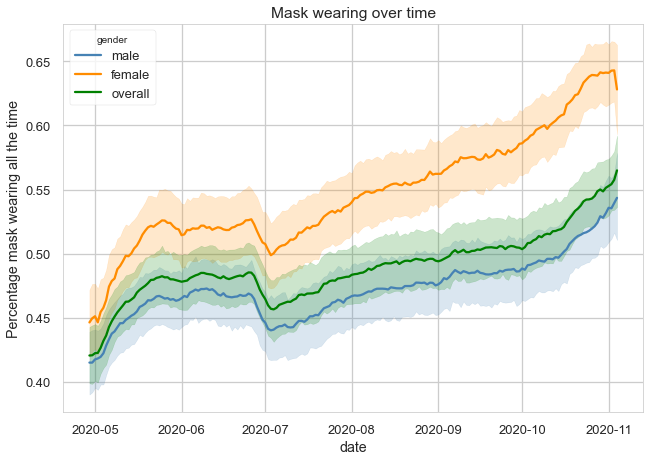

In [68]:
g = sns.lineplot(data=df, x="date", y="pct_wear_mask_all_time", hue="gender", palette=gender_palette, hue_order=gender_order)
g.set_title("Mask wearing over time")
g.set_ylabel("Percentage mask wearing all the time");

# HDI Map

In [50]:
covid_cases = pd.read_csv("data/Corona_stats/owid-covid-data.csv")

In [51]:
df1 = covid_cases[covid_cases["date"]=="2020-11-19"]

In [55]:
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
246,ABW,North America,Aruba,2020-11-19,4685.0,9.0,7.714,45.0,1.0,0.286,43881.011,84.296,72.254,421.482,9.366,2.676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
575,AFG,Asia,Afghanistan,2020-11-19,43851.0,0.0,177.429,1645.0,0.0,9.143,1126.454,0.000,4.558,42.257,0.000,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
822,AGO,Africa,Angola,2020-11-19,13818.0,203.0,143.143,328.0,6.0,2.857,420.431,6.177,4.355,9.980,0.183,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.80,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1064,AIA,North America,Anguilla,2020-11-19,3.0,0.0,0.000,NaN,0.0,0.000,199.973,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
1324,ALB,Europe,Albania,2020-11-19,29837.0,711.0,576.571,646.0,9.0,8.000,10367.989,247.064,200.351,224.477,3.127,2.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785


In [69]:
fig = px.choropleth(
        data_frame = df1,
        locations="iso_code",
        color="human_development_index",
        hover_name="location",
        projection="natural earth",
        color_continuous_scale=px.colors.diverging.BrBG,
        basemap_visible=False)

fig.show("browser")

In [ ]:
color_discrete_map={
                "low": "peru",
                "middle": "burlywood",
                "high": "skyblue",
                "very high": "steelblue"}

"peru", "burlywood", "skyblue", "steelblue"